
**Name:** Saadullah Khan

**Problem -1** Compare Gradient Descent method and Newton Methods (4 point)


Consider the following function over $x \in \mathbb{R}^2$ (depicted in Figure 1):

$$F(x) = x^T \Sigma x + \log(1 + \exp(-1^T x)), \text{ where } 1 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}, \text{ and } \Sigma = \begin{bmatrix} 5 & 0 \\ 0 & 0.5 \end{bmatrix}$$



The problem asks you to implement Gradient Descent and Newton methods in Python to minimize the above function $F$, and in each case, to plot $F(x_t)$ as a function of iterations $t \in [1, 2, \ldots, 30]$ (all on the same plot for comparison).

## Implementation details:
For either methods, and any step size, start in iteration $t = 1$ at the point $(0, 0)$ for fairer comparison.

Here we can calculate $2/\beta = 0.195$, i.e., in terms of the smoothness constant $\beta$ of $F$ (via its Hessian). According to theory, we should set the step size $\eta$ for Gradient Descent to $\eta < 2/\beta$. In the case of Newton, which uses a better approximation, we can use a larger step size.

Therefore, on the same figure, plot $F(x_t)$ against $t \in [1, 2, \ldots, 30]$ for the following 4 configurations, and label each curve appropriately as given below (NM1 through GD0.2):

- (NM1) Newton Method with constant step size $\eta = 1$
- (GD0.1) Gradient Descent Method with constant step size $\eta = 0.1$
- (GD0.19) Gradient Descent Method with constant step size $\eta = 0.19$
- (GD0.2) Gradient Descent Method with constant step size $\eta = 0.2$

Plot the optimization trajectories of all four methods (Newton and three gradient descent variants) on the same contour plot of F(x), showing how each algorithm navigates from the starting point (0,0) toward the minimum.

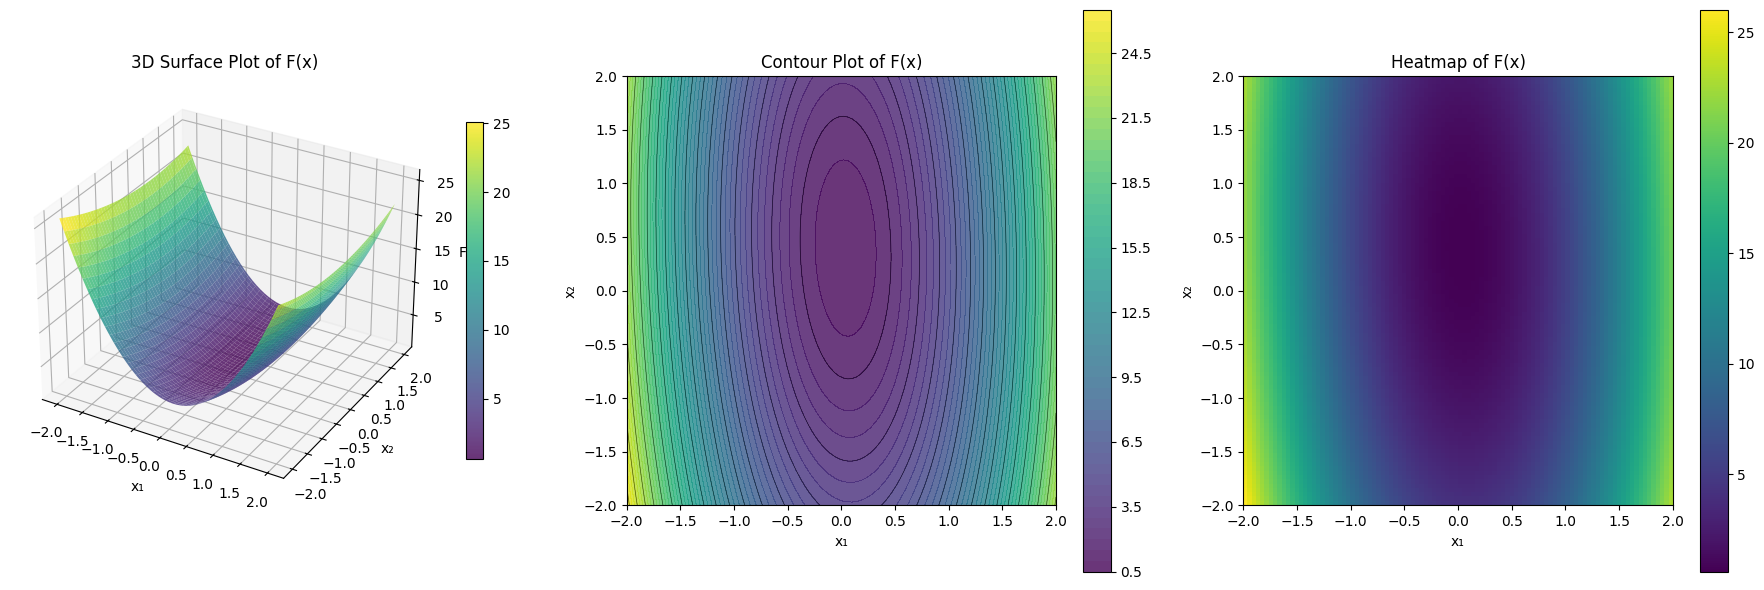

Function Analysis:
F(x) = x^T Σ x + log(1 + exp(-1^T x))
where Σ = [[5, 0], [0, 0.5]] and 1 = [1, 1]

Function values at specific points:
F([0 0]) = 0.6931
F([1 1]) = 5.6269
F([-1 -1]) = 7.6269
F([ 0.5 -0.5]) = 2.0681

Approximate minimum on grid:
x* ≈ [0.020, 0.384]
F(x*) ≈ 0.5871

At minimum point:
Quadratic term: 0.0757
Log term: 0.5114


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def F(x):
    """
    Compute F(x) = x^T Σ x + log(1 + exp(-1^T x))
    where x is a 2D vector, Σ is the covariance matrix, and 1 is the vector [1,1]
    """
    # Define the matrices
    Sigma = np.array([[5, 0],
                      [0, 0.5]])
    ones_vector = np.array([1, 1])

    # Compute x^T Σ x (quadratic form)
    quadratic_term = x.T @ Sigma @ x

    # Compute -1^T x = -(1*x1 + 1*x2)
    linear_term = -ones_vector.T @ x

    # Compute log(1 + exp(-1^T x))
    # Use log1p and exp for numerical stability
    log_term = np.log1p(np.exp(linear_term))

    return quadratic_term + log_term

def F_vectorized(X, Y):
    """
    Vectorized version of F for plotting over a grid
    """
    # Reshape for vectorized computation
    X_flat = X.flatten()
    Y_flat = Y.flatten()

    # Stack to create array of 2D points
    points = np.column_stack([X_flat, Y_flat])

    # Compute F for all points
    Z_flat = np.array([F(point) for point in points])

    # Reshape back to grid shape
    return Z_flat.reshape(X.shape)

# Create a grid of points
x_range = np.linspace(-2, 2, 100)
y_range = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_range, y_range)

# Compute function values
Z = F_vectorized(X, Y)

# Create the plots
fig = plt.figure(figsize=(18, 6))

# 3D Surface Plot
ax1 = fig.add_subplot(131, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')
ax1.set_xlabel('x₁')
ax1.set_ylabel('x₂')
ax1.set_zlabel('F(x)')
ax1.set_title('3D Surface Plot of F(x)')
plt.colorbar(surf, ax=ax1, shrink=0.6)

# Contour Plot
ax2 = fig.add_subplot(132)
contour = ax2.contour(X, Y, Z, levels=20, colors='black', alpha=0.6, linewidths=0.5)
contourf = ax2.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.8)
ax2.set_xlabel('x₁')
ax2.set_ylabel('x₂')
ax2.set_title('Contour Plot of F(x)')
ax2.set_aspect('equal')
plt.colorbar(contourf, ax=ax2)

# Heatmap
ax3 = fig.add_subplot(133)
heatmap = ax3.imshow(Z, extent=[-2, 2, -2, 2], origin='lower', cmap='viridis', aspect='equal')
ax3.set_xlabel('x₁')
ax3.set_ylabel('x₂')
ax3.set_title('Heatmap of F(x)')
plt.colorbar(heatmap, ax=ax3)

plt.tight_layout()
plt.show()

# Print some analysis
print("Function Analysis:")
print("F(x) = x^T Σ x + log(1 + exp(-1^T x))")
print("where Σ = [[5, 0], [0, 0.5]] and 1 = [1, 1]")
print()

# Evaluate at some specific points
test_points = [
    np.array([0, 0]),
    np.array([1, 1]),
    np.array([-1, -1]),
    np.array([0.5, -0.5])
]

print("Function values at specific points:")
for i, point in enumerate(test_points):
    value = F(point)
    print(f"F({point}) = {value:.4f}")

# Find approximate minimum using a simple grid search
min_idx = np.unravel_index(np.argmin(Z), Z.shape)
min_x1 = X[min_idx]
min_x2 = Y[min_idx]
min_value = Z[min_idx]

print(f"\nApproximate minimum on grid:")
print(f"x* ≈ [{min_x1:.3f}, {min_x2:.3f}]")
print(f"F(x*) ≈ {min_value:.4f}")

# Analyze the components
print(f"\nAt minimum point:")
print(f"Quadratic term: {np.array([min_x1, min_x2]).T @ np.array([[5, 0], [0, 0.5]]) @ np.array([min_x1, min_x2]):.4f}")
print(f"Log term: {np.log1p(np.exp(-(min_x1 + min_x2))):.4f}")

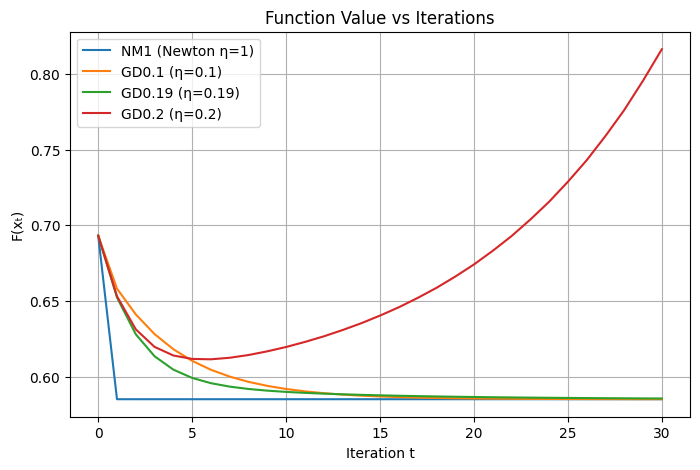

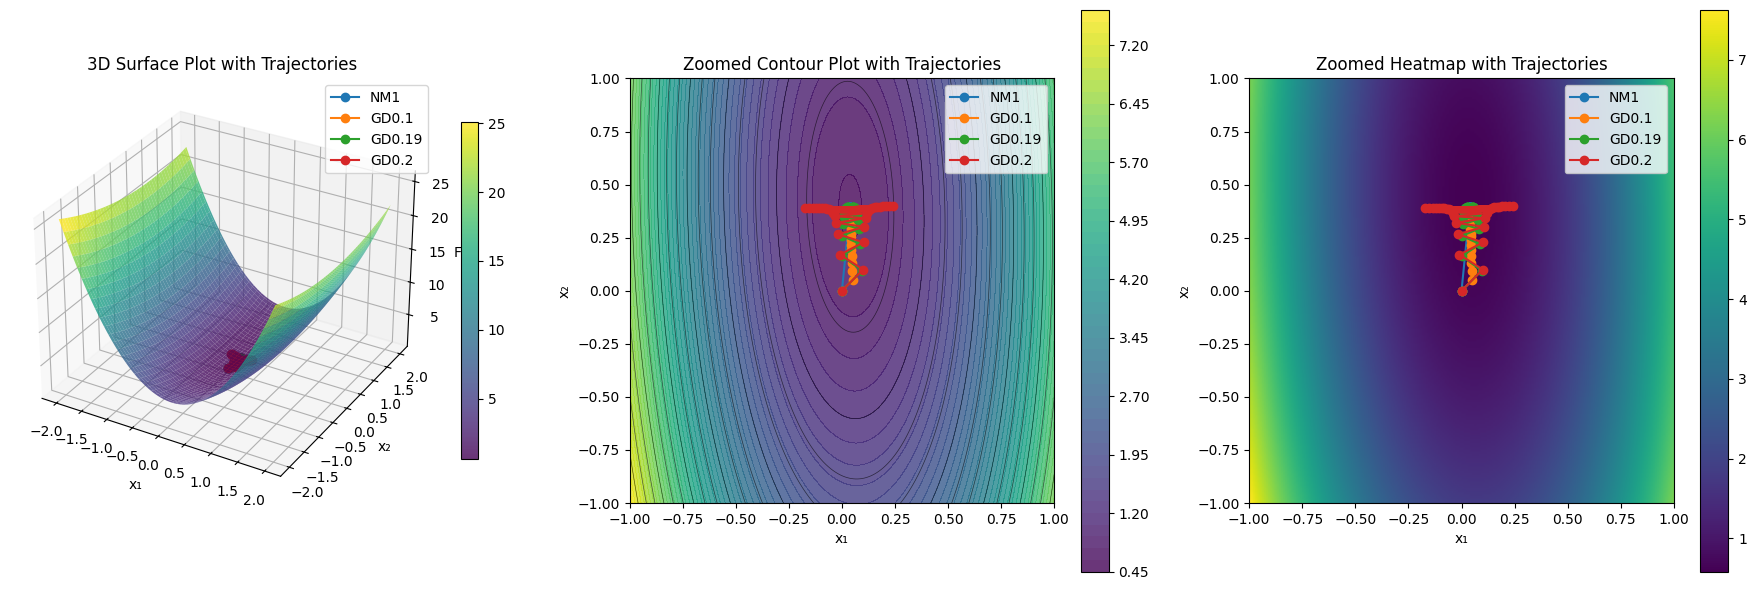

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Define function, gradient, Hessian ---
Sigma = np.array([[5, 0],
                  [0, 0.5]])
ones = np.array([1, 1])

def F(x):
    """F(x) = x^T Σ x + log(1 + exp(-1^T x))"""
    quad = x.T @ Sigma @ x
    lin = -ones.T @ x
    logterm = np.log1p(np.exp(lin))
    return quad + logterm

def grad_F(x):
    """Gradient of F(x)"""
    lin = -ones.T @ x
    # derivative of log(1+exp(-1^T x)) wrt x = -1 * sigmoid(-1^T x)
    sigmoid = 1 / (1 + np.exp(lin))  # actually this is σ(-1^T x)
    grad_quad = 2 * Sigma @ x
    grad_log = -ones * (1 - sigmoid)  # derivative of log-term wrt x
    return grad_quad + grad_log

def hessian_F(x):
    """Hessian of F(x)"""
    lin = -ones.T @ x
    s = 1 / (1 + np.exp(lin))  # σ(-1^T x)
    # second derivative of log term: s*(1-s)*1*1^T
    W = s * (1 - s)
    H_quad = 2 * Sigma
    H_log = np.outer(ones, ones) * W
    return H_quad + H_log

# --- Algorithms ---
def gradient_descent(x0, eta, steps):
    x = x0.copy()
    xs, fs = [x.copy()], [F(x)]
    for _ in range(steps):
        x = x - eta * grad_F(x)
        xs.append(x.copy())
        fs.append(F(x))
    return np.array(xs), np.array(fs)

def newton_method(x0, eta, steps):
    x = x0.copy()
    xs, fs = [x.copy()], [F(x)]
    for _ in range(steps):
        H = hessian_F(x)
        g = grad_F(x)
        # Solve H p = g
        p = np.linalg.solve(H, g)
        x = x - eta * p
        xs.append(x.copy())
        fs.append(F(x))
    return np.array(xs), np.array(fs)

# --- Run experiments ---
x0 = np.array([0.0, 0.0])
steps = 30

xs_nm1, fs_nm1 = newton_method(x0, eta=1.0, steps=steps)
xs_gd01, fs_gd01 = gradient_descent(x0, eta=0.1, steps=steps)
xs_gd019, fs_gd019 = gradient_descent(x0, eta=0.19, steps=steps)
xs_gd02, fs_gd02 = gradient_descent(x0, eta=0.2, steps=steps)

# --- Plot F(x_t) vs iterations ---
plt.figure(figsize=(8,5))
plt.plot(fs_nm1, label='NM1 (Newton η=1)')
plt.plot(fs_gd01, label='GD0.1 (η=0.1)')
plt.plot(fs_gd019, label='GD0.19 (η=0.19)')
plt.plot(fs_gd02, label='GD0.2 (η=0.2)')
plt.xlabel('Iteration t')
plt.ylabel('F(xₜ)')
plt.title('Function Value vs Iterations')
plt.legend()
plt.grid(True)
plt.show()

# --- 3D Surface, Contour, and Heatmap with trajectories ---
x_zoom = np.linspace(-1, 1, 200)
y_zoom = np.linspace(-1, 1, 200)
X_zoom, Y_zoom = np.meshgrid(x_zoom, y_zoom)
Z_zoom = np.array([[F(np.array([xx, yy])) for xx, yy in zip(x_row, y_row)]
                   for x_row, y_row in zip(X_zoom, Y_zoom)])

fig = plt.figure(figsize=(18, 6))

# 3D Surface Plot (full range)
ax1 = fig.add_subplot(131, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')
# Overlay trajectories
for xs, label in zip([xs_nm1, xs_gd01, xs_gd019, xs_gd02],
                     ['NM1', 'GD0.1', 'GD0.19', 'GD0.2']):
    ax1.plot(xs[:,0], xs[:,1], [F(x) for x in xs], 'o-', label=label)
ax1.set_xlabel('x₁')
ax1.set_ylabel('x₂')
ax1.set_zlabel('F(x)')
ax1.set_title('3D Surface Plot with Trajectories')
ax1.legend()
plt.colorbar(surf, ax=ax1, shrink=0.6)

#Contour Plot
ax2 = fig.add_subplot(132)
contour = ax2.contour(X_zoom, Y_zoom, Z_zoom, levels=20, colors='black', alpha=0.6, linewidths=0.5)
contourf = ax2.contourf(X_zoom, Y_zoom, Z_zoom, levels=50, cmap='viridis', alpha=0.8)
for xs, label in zip([xs_nm1, xs_gd01, xs_gd019, xs_gd02],
                     ['NM1', 'GD0.1', 'GD0.19', 'GD0.2']):
    ax2.plot(xs[:,0], xs[:,1], 'o-', label=label)
ax2.set_xlabel('x₁')
ax2.set_ylabel('x₂')
ax2.set_title('Zoomed Contour Plot with Trajectories')
ax2.set_aspect('equal')
ax2.legend()
plt.colorbar(contourf, ax=ax2)

# Heatmap
ax3 = fig.add_subplot(133)
heatmap = ax3.imshow(Z_zoom, extent=[-1, 1, -1, 1], origin='lower', cmap='viridis', aspect='equal')
for xs, label in zip([xs_nm1, xs_gd01, xs_gd019, xs_gd02],
                     ['NM1', 'GD0.1', 'GD0.19', 'GD0.2']):
    ax3.plot(xs[:,0], xs[:,1], 'o-', label=label)
ax3.set_xlabel('x₁')
ax3.set_ylabel('x₂')
ax3.set_title('Zoomed Heatmap with Trajectories')
ax3.legend()
plt.colorbar(heatmap, ax=ax3)

plt.tight_layout()
plt.show()






**Problem 0** (2 points) In what follows we will use the convention that the gradient is a column vector, which is the transpose of the Jacobian in dimension 1.

**(a)** Let's consider the function $g(x) = Ax$, where $x \in \mathbb{R}^d$ and $A \in \mathbb{R}^{k \times d}$. In the special case $k = 1$, show that the gradient of $g$ is equal to $A^T$.

**(b)** Now, consider the case $k > 1$, where we might write $g(x) = Ax = [g_1(x), g_2(x), \ldots, g_k(x)]^T$. Recall that the Jacobian is a generalization of the gradient to multivariate functions $g$. That is, the Jacobian of $g$ is the matrix of partial derivatives whose $(i,j)^{th}$ entry is $\frac{\partial g_i}{\partial x_j}$. How does the Jacobian matrix relate to the gradients of the components $g_i$ of $g$? Argue for there that the Jacobian matrix of $g$ above is given as $J_g(x) = A$.

**(c)** Now consider the function $g(x) = x^T A x$, where $x \in \mathbb{R}^d$ and $A \in \mathbb{R}^{d \times d}$. Show that the gradient of $g$ is given as $\nabla g(x) = Ax + A^T x$ (it then follows that when $A$ is symmetric, $\nabla g(x) = 2Ax$).

**Hint:** You can write $x^T A x = \sum_{i,j} A_{i,j} \cdot x_i x_j$.

**(d)** Let $f(z)$ be a function from real numbers to real numbers. What is the gradient of $f(Ax)$? Let us define the matrix $H$ such that $H_{ij}=\frac{\partial^2 f(Ax)}{\partial x_i \partial x_j}$. What is $H$?

**Problem 0 Answer**

**a)**

Let $g(x)=Ax$ with $A\in\mathbb{R}^{1\times d}$ which a row vector.  
Then
$g(x)=\sum_{j=1}^d A_j x_j$,
So 

$$\frac{\partial g}{\partial x_j}=A_j$$

With the convention that the gradient is a column vector,
$$\nabla g(x)=
\begin{bmatrix}
A_1\\ \vdots\\ A_d
\end{bmatrix}
=A^{\top}$$

**b)**
Write $g(x)=Ax=[g_1(x),\dots,g_k(x)]^{\top}$ with $A\in\mathbb{R}^{k\times d}$.  
The Jacobian $J_g(x)$ has entries
$
(J_g)_{ij}=\frac{\partial g_i}{\partial x_j}
$
But $g_i(x)$ is the linear form given by the $i$-th row of $A$, so the $i$-th row of $J_g(x)$ is exactly the $i$-th row of $A$.  
Equivalently,
$$
J_g(x)=
\begin{bmatrix}
\nabla g_1(x)^{\top}\\
\nabla g_2(x)^{\top}\\
\vdots\\
\nabla g_k(x)^{\top}
\end{bmatrix}
=A.
$$

**c)**
Let $g(x)=x^{\top} A x$ with $A\in\mathbb{R}^{d\times d}$.  
Write
$
g(x)=\sum_{i,j} A_{ij}x_i x_j.
$
Then for each $\ell$-th,
$$
\frac{\partial g}{\partial x_\ell}
=\sum_{i}A_{i\ell}x_i+\sum_{j}A_{\ell j}x_j
=(Ax)_\ell+(A^{\top}x)_\ell.
$$
If $A$ is symmetric, this reduces to $\nabla g(x)=2Ax$.


**d)**
Let $f:\mathbb{R}\to\mathbb{R}$ and consider $h(x)=f(Ax)$ where $A\in\mathbb{R}^{1\times d}$ is a row vector.  
By the chain rule,
$$
\nabla_x f(Ax)=\nabla f(Ax)\,A^{\top}
$$
The Hessian $H$ with entries $H_{ij}=\frac{\partial^2 f(Ax)}{\partial x_i\partial x_j}$ is
$$
H=\nabla^2f(Ax)\,A^{\top}A
$$

**Problem 1** (1 point)

$Y$ is categorical variable taking values $\{1, 2, \cdots, K\}$. Assume we have a $K$-dimensional function $f(x) = [f_1(x), \cdots, f_K(x)]^{\top}$ that is supposed to models probabilities such that $f_k(x)=\Pr[Y=k|X=x]$.



*   What is $\sum_{k=1}^K f_k(x)$?





*   Suppose we seek to measure the performance of a classifier (based on $f(x)$) on the  training observations $D_{train} = \{(x_1,y_1), \cdots, (x_n,y_n) \}$. Suppose the classifier is defined as $\hat y(x) = \arg \max_{1 \leq k \leq K} f_k(x)$. Argmax is an operation that finds the argument that gives the maximum value from a target function. Argmax is most commonly used in machine learning for finding the class with the largest predicted probability. Compute the proportion of errors in the training data using this classifier in terms of an indicator function $I_{[a \neq b]}$ which is one is $a \neq b$ and zero otherwise.




**Problem 1 Answer**

A)
We have  

$$
\sum_{k=1}^{K} f_k(x) = 1
$$

because the $f_k(x)$ represent class probabilities.

B)
With $\hat y(x) = \arg\max_{1\le k\le K} f_k(x)$,  the proportion of training errors is  
$$
\frac{1}{n}\sum_{i=1}^{n} 
I\!\Bigl[
\hat y(x_i)\neq y_i
\Bigr]
=
\frac{1}{n}\sum_{i=1}^{n} 
I\!\Bigl[
\arg\max_{1\le k\le K} f_k(x_i)\neq y_i
\Bigr].
$$


**Problem 2** (2 points)

Suppose we seek to estimate classifier on the basis of training observations $D_{train} = \{(x_1,y_1), \cdots, (x_n,y_n) \}$, where $y_1, \cdots, y_n$ are qualitative taking categorical values $1, 2, 3, \cdots, K$ and $x \in \Re^p$.

To that end we need a function that models $\Pr[Y=k|X=x]$.

* Let us say we have a $K$-dimensional function $f(x) = [f_1(x), \cdots, f_K(x)]^{\top}$ that is supposed to models these probabilities such that $f_k(x)=\Pr[Y=k|X=x]$. Assuming that the observations are independent, compute the probability of $\Pr[D_{train}]$ in terms of $f_1(x), \cdots, f_K(x)$ and $(x_1,y_1), \cdots, (x_n,y_n)$ and using the indicator function $I_{[y_i=k]}$. Note that the indicator fucntion is defined such that $I_{[y_i=k]}$ is 1 if $y_i=k$ and 0 otherwise (where $k \in \{1, 2, \cdots, K\}$.)



* Let us consider binary classication.  We use $ y \in \{ 0, 1\}$ for binary classification so that $f_0(x)=\Pr[Y=0|X=x]$ and $f_1(x)=\Pr[Y=1|X=x]$. What is $\Pr[D_{train}]$ in terms of $f_0(x), f_1(x)$ and $(x_1,y_1), \cdots, (x_n,y_n)$ without using the indicator function? What is $\log \Pr[D_{train}]$? Simplify $\log \Pr[D_{train}]$ to only depend on $f_0(x)$ and $(x_1,y_1), \cdots, (x_n,y_n)$.



* A specific class of functions for classification are known as linear models for classification. (Read chapter 4 of the Pattern Recofnition and Machine Learning book.) We are still considering binary classification. Here we use a linear function for classification so that $f_0(x) = \sigma(\beta_0 + x^\top \beta)$ where $\sigma$ is a function that receives a real number between $-\infty$ and $+\infty$ and maps it to a number between zero and one. What is $\log \Pr[D_{train}]$?


* For the setup above, compute $\nabla_{\beta} \log \Pr[D_{train}]$. Given the the explicit form of $\sigma(.)$ is not given provide your answer in terms of derivatives of $\sigma(.)$, eg $\dot \sigma(z) = \frac{d \sigma(z)}{dz}$.

Note: For any generic function $h(z): \Re^p \rightarrow \Re$ (a function that receives a vector and maps it to a real number), the gradient of $h(z)$ is defined as $\nabla_z h(z) = [\frac{\partial h}{ \partial z_1}, \cdots, \frac{\partial h}{ \partial z_p}]^\top$.





**Problem 2 Answer**

**Multiclass Likelihood**

Assume independent observations 
$D_{\text{train}}=\{(x_i,y_i)\}_{i=1}$,
$y_i\in\{1,\dots,K\}$, and $f(x)=[f_1(x),\dots,f_K(x)]^\top$ with
$f_k(x)=\Pr(Y=k\mid X=x)$. Using the indicator $I_{[y_i=k]}$,

$$
\Pr[D_{\text{train}}]
=\prod_{i=1}^n \Pr(Y=y_i\mid X=x_i)
=\prod_{i=1}^n \prod_{k=1}^K f_k(x_i)^{\,I_{[y_i=k]}}.
$$

---

**Binary Classification $y\in\{0,1\$**

Let $f_0(x)=\Pr(Y=0\mid X=x$ and $f_1(x)=\Pr(Y=1\mid X=x)$.  
Without indicator functions the likelihood is

$$
\Pr[D_{\text{train}}]
=\prod_{i=1}^n f_1(x_i)^{y_i}\,f_0(x_i)^{1-y_i}.
$$

The log-likelihood is

$$
\log \Pr[D_{\text{train}}]
=\sum_{i=1}^n \bigl[y_i\log f_1(x_i) + (1-y_i)\log f_0(x_i)\bigr].
$$

Using $f_1(x)=1-f_0(x)$ we can write the log-likelihood solely in terms of $f_0$:

$$
\log \Pr[D_{\text{train}}]
=\sum_{i=1}^n \bigl[y_i\log(1-f_0(x_i)) + (1-y_i)\log f_0(x_i)\bigr].
$$

---

**Linear Model for $f_0$**

Suppose

$$
f_0(x)=\sigma(z),\qquad z=\beta_0+x^\top\beta,
$$

where $\sigma:\mathbb{R}\to(0,1)$ and denote $\dot\sigma(z)=\tfrac{d}{dz}\sigma(z)$.
Then

$$
\log \Pr[D_{\text{train}}]
=\sum_{i=1}^n \Bigl[\,y_i\log\bigl(1-\sigma(z_i)\bigr) + (1-y_i)\log\bigl(\sigma(z_i)\bigr)\Bigr],
$$
with $z_i=\beta_0+x_i^\top\beta$.

---

**Gradient with respect to $\beta$**

For one term (index $i$) use
$\nabla_\beta \sigma(z_i)=\dot\sigma(z_i)x_i$. Then

$$
\begin{aligned}
\nabla_\beta \log \Pr[D_{\text{train}}]
&=\sum_{i=1}^n \left[
y_i\,\nabla_\beta\log\bigl(1-\sigma(z_i)\bigr)
+(1-y_i)\,\nabla_\beta\log\bigl(\sigma(z_i)\bigr)
\right]
\\[6pt]
&=\sum_{i=1}^n \left[
y_i\left(-\frac{\dot\sigma(z_i)}{1-\sigma(z_i)}\right)x_i
+(1-y_i)\left(\frac{\dot\sigma(z_i)}{\sigma(z_i)}\right)x_i
\right]
\\[6pt]
&=\sum_{i=1}^n \dot\sigma(z_i)\,x_i\left(\frac{1-y_i}{\sigma(z_i)}-\frac{y_i}{1-\sigma(z_i)}\right).
\end{aligned}
$$

This simplifies to

$$
\nabla_\beta \log \Pr[D_{\text{train}}]
=\sum_{i=1}^n \dot\sigma(z_i)\,x_i\cdot\frac{1-y_i-\sigma(z_i)}{\sigma(z_i)\,(1-\sigma(z_i))}.
$$

---

**Special Case: Logistic Sigmoid**

If $\sigma(z)=\dfrac{1}{1+e^{-z}}$ then $\dot\sigma(z)=\sigma(z)(1-\sigma(z))$.  
Substituting gives

$$
\nabla_\beta \log \Pr[D_{\text{train}}]
=\sum_{i=1}^n x_i\bigl((1-y_i)-\sigma(z_i)\bigr)
=\sum_{i=1}^n x_i\bigl((1-y_i)-f_0(x_i)\bigr).
$$

If one instead models $f_1(x)=\sigma(z)$ the gradient is
$\sum_i x_i(y_i-\sigma(z_i))$, the usual logistic-regression form.


**Problem 3** (1 points)

**Text as a sequence of words**

We need to distinguish two ways of talking about words. Types are the number of distinct words in a corpus; if the set of words in the vocabulary is $V$, the number of types is the word token vocabulary size $|V|$. Tokens are the total number $N$ of running words.

The rough numbers of types and tokens computed from some
popular English corpora shows that the larger the corpora we look at, the more word types
we find, and in fact this relationship between the number of types $|V|$ and number of tokens $N$ is called Herdan's Law (Herdan, 1960) or Heaps' Law (Heaps, 1978) after its discoverers (in linguistics and information retrieval). It is shown
below, where $k$ and $\beta$ are positive constants, and $0 < \beta < 1$:

$$
|V| = k N^{\beta}.
$$

Our objective is to see if the relationship described in the equation above is consistent with our empirical observation of the 18 texts we have at our disposal from the Gutenberg corpora.

Below this problem the code is given and the parts of it which you need to fill is indicated. Note that it uses `.lower()`.


* write a code that computes $|V|$ and $N$ for each of the 18 texts in the Gutenberg corpora. Plot a scatter plot of $|V|$ vs $N$.

* Use the $\log$ to find a linear equation. Use it to formulate the estimation of $\log k$ and $\beta$ in terms of a simple linear regression problem. Make a scatter plot in the $\log$-scale and include the estimated regression line. The plot should include the estimate equation.

* Compute the confidence interval for $\beta$.

* Does your observation confirm or reject Herdan's Law (Herdan, 1960) or Heaps' Law (Heaps, 1978) ?

Now remove the `.lower()` in the code and repeat the steps. We like to see if our conclusions are dependent on it or not.

* What is the function of `.lower()`?
* Repeat the steps above with `.lower()` removed.
* Compare the estimated $\beta$ and and $k$ with the previous part and comment on it in relation to Herdan's Law.


**Hint.**

You may find the following useful:

https://www.nltk.org/book




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saad_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\saad_\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


Title: austen-emma.txt
Number of unique tokens: 7914
Length of work: 191851

Title: austen-persuasion.txt
Number of unique tokens: 5925
Length of work: 97939

Title: austen-sense.txt
Number of unique tokens: 6647
Length of work: 141439

Title: bible-kjv.txt
Number of unique tokens: 17120
Length of work: 947006

Title: blake-poems.txt
Number of unique tokens: 1534
Length of work: 8239

Title: bryant-stories.txt
Number of unique tokens: 3990
Length of work: 55648

Title: burgess-busterbrown.txt
Number of unique tokens: 1536
Length of work: 18568

Title: carroll-alice.txt
Number of unique tokens: 2809
Length of work: 33533

Title: chesterton-ball.txt
Number of unique tokens: 8447
Length of work: 97271

Title: chesterton-brown.txt
Number of unique tokens: 7994
Length of work: 85487

Title: chesterton-thursday.txt
Number of unique tokens: 6465
Length of work: 69443

Title: edgeworth-parents.txt
Number of unique tokens: 8709
Length of work: 209268

Title: melville-moby_dick.txt
Number of uni

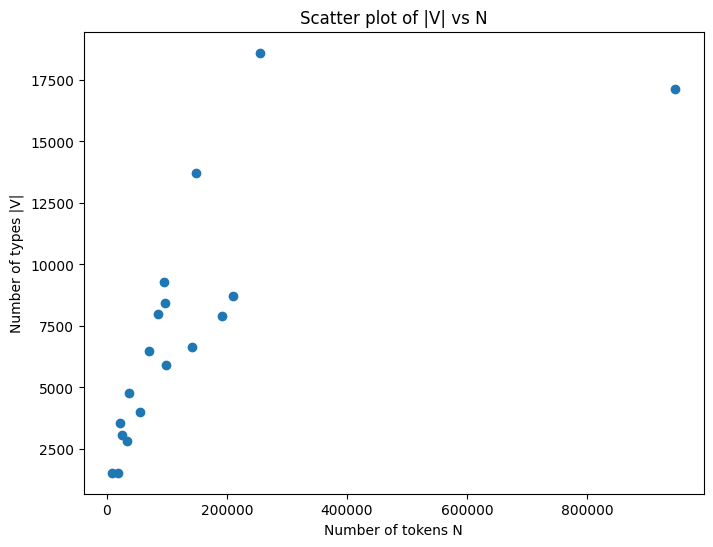

Estimated beta: 0.5859749035869012
Estimated log(k): 2.093682986968255


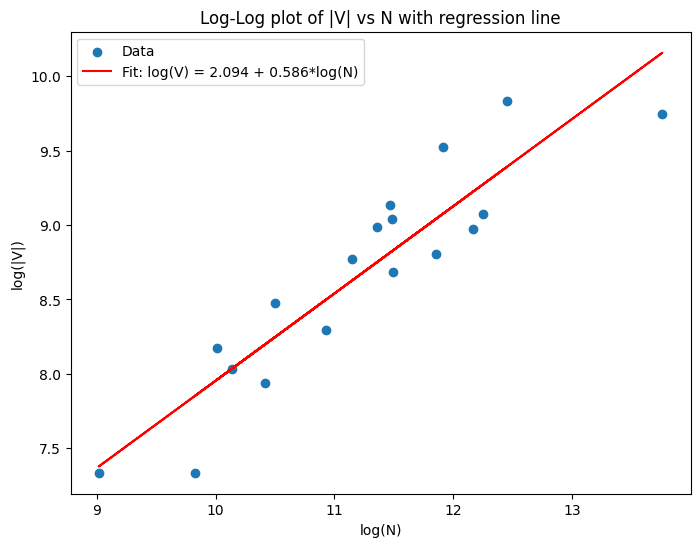

95% confidence interval for beta: (np.float64(0.44908613217612203), np.float64(0.7228636749976803))


In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import gutenberg
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Ensure resources are downloaded
nltk.download('punkt')
nltk.download('gutenberg')

# Initialize lists
N = []
V = []

# Loop through each text
for fileid in gutenberg.fileids():
    raw_text = gutenberg.raw(fileid).lower()
    tokens = word_tokenize(raw_text)
    unique_tokens = len(set(tokens))
    length = len(tokens)
    
    # Save for plotting
    N.append(length)
    V.append(unique_tokens)
    
    # Print information
    print(f"Title: {fileid}")
    print(f"Number of unique tokens: {unique_tokens}")
    print(f"Length of work: {length}\n")

# Scatter plot of V vs N
plt.figure(figsize=(8,6))
plt.scatter(N, V)
plt.xlabel("Number of tokens N")
plt.ylabel("Number of types |V|")
plt.title("Scatter plot of |V| vs N")
plt.show()

# Log-transform for regression
log_N = np.log(N)
log_V = np.log(V)

# Perform linear regression: log(V) = log(k) + beta * log(N)
slope, intercept, r_value, p_value, std_err = stats.linregress(log_N, log_V)
print(f"Estimated beta: {slope}")
print(f"Estimated log(k): {intercept}")

# Scatter plot in log-log scale with regression line
plt.figure(figsize=(8,6))
plt.scatter(log_N, log_V, label="Data")
plt.plot(log_N, intercept + slope*log_N, color='red', label=f"Fit: log(V) = {intercept:.3f} + {slope:.3f}*log(N)")
plt.xlabel("log(N)")
plt.ylabel("log(|V|)")
plt.title("Log-Log plot of |V| vs N with regression line")
plt.legend()
plt.show()

# 95% confidence interval for beta
t_val = stats.t.ppf(0.975, df=len(log_N)-2)  # two-sided 95%
beta_ci = (slope - t_val*std_err, slope + t_val*std_err)
print(f"95% confidence interval for beta: {beta_ci}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saad_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\saad_\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


Title: austen-emma.txt
Number of unique tokens: 8376
Length of work: 191855

Title: austen-persuasion.txt
Number of unique tokens: 6218
Length of work: 97940

Title: austen-sense.txt
Number of unique tokens: 7078
Length of work: 141440

Title: bible-kjv.txt
Number of unique tokens: 18120
Length of work: 947008

Title: blake-poems.txt
Number of unique tokens: 1815
Length of work: 8239

Title: bryant-stories.txt
Number of unique tokens: 4460
Length of work: 55649

Title: burgess-busterbrown.txt
Number of unique tokens: 1739
Length of work: 18571

Title: carroll-alice.txt
Number of unique tokens: 3157
Length of work: 33535

Title: chesterton-ball.txt
Number of unique tokens: 9050
Length of work: 97277

Title: chesterton-brown.txt
Number of unique tokens: 8482
Length of work: 85489

Title: chesterton-thursday.txt
Number of unique tokens: 6916
Length of work: 69443

Title: edgeworth-parents.txt
Number of unique tokens: 9845
Length of work: 209310

Title: melville-moby_dick.txt
Number of uni

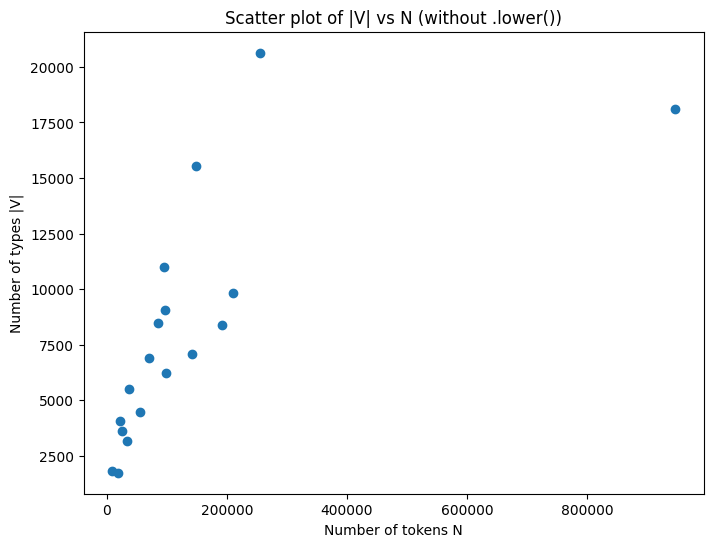

Estimated beta (without .lower()): 0.564160873271721
Estimated log(k) (without .lower()): 2.444058130547491


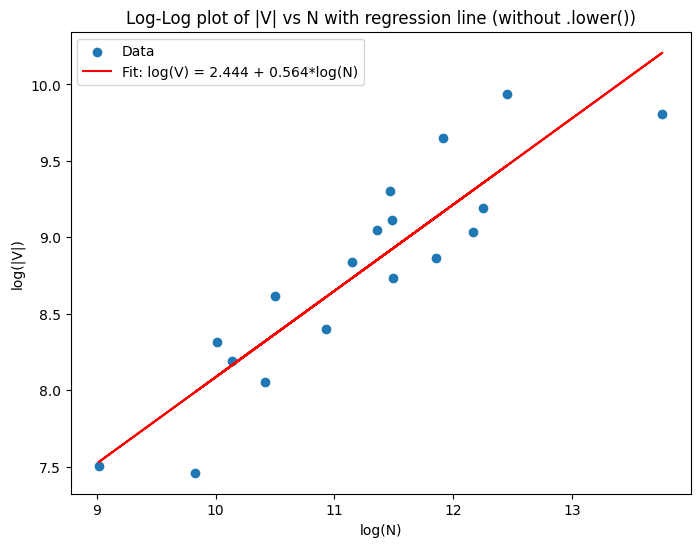

95% confidence interval for beta: (np.float64(0.421740402251794), np.float64(0.7065813442916481))


In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import gutenberg
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Ensure resources are downloaded
nltk.download('punkt')
nltk.download('gutenberg')

# Initialize lists
N = []
V = []

# Loop through each text without .lower()
for fileid in gutenberg.fileids():
    raw_text = gutenberg.raw(fileid)  # Removed .lower()
    tokens = word_tokenize(raw_text)
    unique_tokens = len(set(tokens))
    length = len(tokens)
    
    # Save for plotting
    N.append(length)
    V.append(unique_tokens)
    
    # Print information
    print(f"Title: {fileid}")
    print(f"Number of unique tokens: {unique_tokens}")
    print(f"Length of work: {length}\n")

# Scatter plot of V vs N
plt.figure(figsize=(8,6))
plt.scatter(N, V)
plt.xlabel("Number of tokens N")
plt.ylabel("Number of types |V|")
plt.title("Scatter plot of |V| vs N (without .lower())")
plt.show()

# Log-transform for regression
log_N = np.log(N)
log_V = np.log(V)

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(log_N, log_V)
print(f"Estimated beta (without .lower()): {slope}")
print(f"Estimated log(k) (without .lower()): {intercept}")

# Log-log plot with regression line
plt.figure(figsize=(8,6))
plt.scatter(log_N, log_V, label="Data")
plt.plot(log_N, intercept + slope*log_N, color='red', 
         label=f"Fit: log(V) = {intercept:.3f} + {slope:.3f}*log(N)")
plt.xlabel("log(N)")
plt.ylabel("log(|V|)")
plt.title("Log-Log plot of |V| vs N with regression line (without .lower())")
plt.legend()
plt.show()

# 95% confidence interval for beta
t_val = stats.t.ppf(0.975, df=len(log_N)-2)
beta_ci = (slope - t_val*std_err, slope + t_val*std_err)
print(f"95% confidence interval for beta: {beta_ci}")



The function $\texttt{.lower()}$ in the preprocessing stage normalizes text by case, ensuring tokens like ''I'' and ''i'' are treated identically. Applying $\texttt{.lower()}$ reduces the vocabulary size $|V|$ (case distinctions are merged) while leaving the total token count $N$ unchanged.

With $\texttt{.lower()}$ applied, the estimated parameters are:

$$
\log k \approx 2.09 \quad (k \approx 8.1), \quad 
\beta \approx 0.59, \quad 
95\%\ \text{CI for } \beta: [0.45, 0.72].
$$

Without $\texttt{.lower()}$, the estimates become:

$$
\log k \approx 2.44 \quad (k \approx 11.5), \quad 
\beta \approx 0.56, \quad 
95\%\ \text{CI for } \beta: [0.42, 0.70].
$$

Omitting $\texttt{.lower()}$ mainly increases the intercept, reflecting a larger baseline vocabulary (e.g., ''IF'' and ''if'' counted separately). The slope $\beta$ remains nearly unchanged, and confidence intervals largely overlap, showing that vocabulary growth rate is robust to case normalization.

According to Herdan's Law, this confirms sublinear vocabulary growth: doubling $N$ increases $|V|$ by roughly $47$%-$51$%, consistent with $\beta \approx 0.56$--$0.59$. While $k$ is sensitive to tokenization, $\beta$ is stable, reflecting a core property of natural language.

Overall, the analysis supports Herdan's Law and shows conclusions are not critically dependent on lowercasing.
